# AMS Project 1

# 1. Vector and Matrix Algebra
### 1A. Load the dataset and perform basic matrix operations such as addition, subtraction, multiplication, and finding the rank of a matrix.

Imports

In [1]:
import numpy as np
import pandas as pd 
import scipy as sp
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from skimage import data, img_as_float
from skimage.color import rgb2gray

Data Loading

In [2]:
white_df=pd.read_csv('/Users/tanweerashif/Studies/AMS_Maths (PR)/winequality-white.csv',sep=';')
red_df=pd.read_csv('/Users/tanweerashif/Studies/AMS_Maths (PR)/winequality-red.csv',sep=';')

Data Cleaning

In [3]:
white_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
white_df.duplicated().sum()

937

In [5]:
white_df.drop_duplicates(inplace=True)

In [6]:
red_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
red_df.duplicated().sum()

240

In [8]:
red_df.drop_duplicates(inplace=True)

In [9]:
red_df.duplicated().sum()

0

Feature and Target Splitting

In [10]:
whitefeat = white_df.iloc[:,:11]
whitetar = white_df.iloc[:,11:]
redfeat = red_df.iloc[:,:11]
redtar = red_df.iloc[:,11:]
print(f"Features of white wine:\n{whitefeat.head()}")
print(f"\nTarget of white wine:\n{whitetar}")
print(f"\nFeatures of red wine:\n{redfeat.head()}")
print(f"\nTarget of red wine:\n{redtar}")

Features of white wine:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9
6            6.2              0.32         0.16             7.0      0.045                 30.0                 136.0   0.9949  3.18       0.47      9.6

Target of white wine:
      quality
0           6
1      

Addition

In [11]:
df_addition = white_df + red_df
df_addition.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,14.4,0.97,0.36,22.6,0.121,56.0,204.0,1.9988,6.51,1.01,18.2,11.0
1,14.1,1.18,0.34,4.2,0.147,39.0,199.0,1.9908,6.50,1.17,19.3,11.0
2,15.9,1.04,0.44,9.2,0.142,45.0,151.0,1.9921,6.52,1.09,19.9,11.0


Subtraction

In [12]:
df_subtraction = white_df - red_df
df_subtraction.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.4,-0.43,0.36,18.8,-0.031,34.0,136.0,0.0032,-0.51,-0.11,-0.6,1.0
1,-1.5,-0.58,0.34,-1.0,-0.049,-11.0,65.0,-0.0028,0.10,-0.19,-0.3,1.0
2,0.3,-0.48,0.36,4.6,-0.042,15.0,43.0,-0.0019,0.00,-0.21,0.3,1.0


Elementwise multiplication

In [13]:
df_multiplication = white_df * red_df
df_multiplication.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,51.80,0.189,0.0,39.33,0.003420,495.0,5780.0,0.998798,10.53,0.2520,82.72,30.0
1,49.14,0.264,0.0,4.16,0.004802,350.0,8844.0,0.990819,10.56,0.3332,93.10,30.0


Matrix Multiplication

In [14]:
df_matmultiplication =  white_df@red_df.T
df_matmultiplication.head(2)

,0,1,2,3,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,92,94,95,96,97,98,99,100,101,103,104,106,107,108,109,110,111,112,113,115,116,117,118,119,120,122,123,124,125,126,127,128,129,130,131,133,134,135,136,137,138,139,142,143,145,146,147,148,149,150,151,152,154,155,158,159,160,161,162,163,164,165,166,167,168,169,170,171,173,174,175,177,178,179,181,182,183,184,185,186,187,188,189,190,191,192,193,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,229,230,231,232,234,235,237,240,241,242,243,245,246,247,248,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,272,273,274,278,279,280,281,282,284,286,287,...,1302,1303,1304,1305,1306,1307,1309,1311,1312,1313,1314,1315,1316,1317,1319,1320,1321,1322,1323,1324,1328,1329,1331,1332,1333,1334,1335,1336,1339,1342,1344,1345,1346,1347,1349,1350,1351,1352,1354,1355,1356,1357,1358,1359,1360,1361,1363,1364,1365,1366,1367,1368,1369,1370,1371,1373,1374,1375,1376,1377,1378,1379,1381,1382,1384,1385,1386,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1402,1403,1404,1405,1406,1407,1408,1410,1411,1413,1414,1415,1417,1418,1419,1421,1422,1423,1424,1426,1427,1428,1429,1430,1431,1432,1433,1434,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1447,1448,1449,1451,1452,1453,1454,1455,1456,1458,1459,1460,1461,1462,1463,1464,1466,1467,1469,1470,1471,1472,1473,1474,1475,1477,1478,1479,1480,1482,1483,1484,1485,1486,1487,1488,1489,1490,1492,1493,1494,1495,1497,1498,1500,1501,1502,1503,1504,1505,1506,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1521,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1558,1559,1562,1565,1566,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1597,1598
0,6490.823218,12750.805807,10084.744237,11215.990573,7598.742373,10917.431101,4462.495520,3698.101382,18417.846593,11931.389661,10951.579349,5544.554627,27253.035719,27720.161549,19327.676737,10454.902357,5457.635367,10505.409242,11734.921962,13333.242288,6953.133567,12025.751977,7976.073522,4601.354996,2265.363396,6793.600997,3309.820736,14931.961251,7521.153772,20117.978382,16310.304134,9281.185231,3585.555119,2932.064768,5923.752667,3738.246234,15637.246728,8821.684758,2985.972037,4549.578302,2305.321546,11638.093223,20591.888877,7048.899482,2465.342566,17050.577625,4308.806227,3132.098001,2869.996955,21826.105842,14142.906645,9032.602878,2146.983347,21232.134093,10176.991518,8456.190426,9924.962553,20154.315172,6719.048622,9983.284192,2334.195316,7334.732352,3035.277166,12507.148327,3825.386376,5489.233017,17307.410856,17008.242376,8022.976728,15615.623428,7786.801884,5969.461727,14358.800366,21649.456547,2884.155401,12598.003377,13569.922567,9602.363442,11399.924801,7879.418516,24253.553747,5894.394287,23013.406313,4647.336918,25909.397951,23693.760847,16488.132619,19028.070003,4515.673337,4087.618946,2157.877852,6757.609247,9234.079177,4332.875271,11812.465112,6565.084846,12752.834312,11757.449057,14649.982593,27896.283037,8746.670176,19086.527976,19731.526221,9061.176999,11375.454747,7528.123363,5301.251087,10400.125451,16334.699361,15786.973006,2570.704023,6510.172398,18497.902886,16741.032768,2405.680641,2407.076186,3094.551021,3704.352835,24351.542857,17838.547799,5396.088495,5750.166976,11653.791296,9510.245352,8449.731492,18748.123441,19346.023441,12170.342142,3738.424465,25627.850962,17132.904109,15619.084317,5873.359526,8060.893402,2327.697061,13422.148450,18175.106070,23532.802747,23317.798292,4498.929782,15647.024652,3935.200246,4001.257537,6260.190316,22517.218448,22469.445648,17164.583496,18202.29

Matrix Rank 

In [15]:
rank_whitedf = np.linalg.matrix_rank(white_df)
rank_reddf = np.linalg.matrix_rank(red_df)
print(rank_whitedf)
print(rank_reddf)

12
12


Determinant of matrices

In [16]:
det_reddftrimmed = np.linalg.det(red_df.iloc[:12,:])
det_whitedftrimmed = np.linalg.det(white_df.iloc[:12,:])
print(det_reddftrimmed)
print(det_whitedftrimmed)

0.10579711224636708
-0.6367430152566117


# 2. Diagonalization and Determinants

### 2A. Compute the determinant of the covariance matrix of the dataset.

White Wine

In [17]:
cov_matrix_white = np.cov(whitefeat.values.T)
det_whitefeatdf = np.linalg.det(cov_matrix_white)
print("\nDeterminant of the covariance matrix for white wine:", det_whitefeatdf)
print(f"Covariance matrix:\n{cov_matrix_white}")


Determinant of the covariance matrix for white wine: 2.2411537450239718e-11
Covariance matrix:
[[ 7.51445810e-01 -1.72280486e-03  3.17325304e-02  3.52405400e-01
   4.81362157e-04 -8.71193700e-01  3.08161394e+00  6.69984264e-04
  -5.66559756e-02 -1.71747250e-03 -1.16884957e-01]
 [-1.72280486e-03  1.06992310e-02 -2.06735547e-03  4.94525087e-02
   2.06197523e-04 -1.82413871e-01  4.56442631e-01  1.82078788e-05
  -7.36016668e-04 -2.48357945e-04  5.89356927e-03]
 [ 3.17325304e-02 -2.06735547e-03  1.49930451e-02  6.32609085e-02
   3.75075485e-04  1.93199963e-01  6.48740995e-01  5.69321864e-05
  -3.39605127e-03  6.87267219e-04 -1.14025375e-02]
 [ 3.52405400e-01  4.94525087e-02  6.32609085e-02  2.36356048e+01
   8.54634397e-03  2.56726088e+01  8.58807174e+01  1.15863529e-02
  -1.22300227e-01 -1.13156816e-02 -2.35595176e+00]
 [ 4.81362157e-04  2.06197523e-04  3.75075485e-04  8.54634397e-03
   5.33735431e-04  4.02657393e-02  1.90456631e-01  1.69832016e-05
  -3.17105482e-04  4.68691784e-05 -1.003

Red Wine

In [18]:
cov_matrix_red = np.cov(redfeat.values.T)
det_redfeatdf = np.linalg.det(cov_matrix_red)
print("\nDeterminant of the covariance matrix for red wine:", det_redfeatdf)
print(f"Covariance matrix:\n{cov_matrix_red}")


Determinant of the covariance matrix for red wine: 3.762237462068396e-11
Covariance matrix:
[[ 3.01713359e+00 -8.11100713e-02  2.26691760e-01  2.60793849e-01
   7.36621492e-03 -2.55107774e+00 -6.02227102e+00  2.17564739e-03
  -1.84921890e-01  5.64047489e-02 -1.15772221e-01]
 [-8.11100713e-02  3.35004632e-02 -1.97287878e-02 -6.06138670e-04
   4.98451966e-04 -4.00502608e-02  4.38443625e-01  8.19017151e-06
   7.01214911e-03 -8.02637666e-03 -3.91770786e-02]
 [ 2.26691760e-01 -1.97287878e-02  3.82345403e-02  3.80488390e-02
   2.02942424e-03 -9.80646343e-02  3.09371620e-01  1.30814165e-04
  -1.66827861e-02  1.08812263e-02  2.22391213e-02]
 [ 2.60793849e-01 -6.06138670e-04  3.80488390e-02  1.82875250e+00
   1.77991081e-03  2.26792558e+00  9.08279381e+00  8.20185907e-04
  -1.74316746e-02 -2.73182384e-03  9.25987011e-02]
 [ 7.36621492e-03  4.98451966e-04  2.02942424e-03  1.77991081e-03
   2.43807454e-03  3.86174481e-04  7.55086423e-02  1.78649019e-05
  -2.07374385e-03  3.32493194e-03 -1.195867

### 2B. Discuss its significance.

Above determinant is nearly 0 means that some features are dependent on one another. There is collinearlity in the data. Some column is depending on another. Determinant helps to check for the collinearity. For any matrix, if the determinant is 0 that means it is not a full rank matrix and so, some rows or columns are dependent on one another.

Significance of covariance matrix and its determinant:
1. It measures the variability and relationships. Each element in the co-variance matrix represents the co-variance between two features.
2. It is used in plotting and intrepreting multi-variate normal distribution.
3. Co-variance matrix is used in finding the PCA components.
4. The determinant of a covariance matrix is a measure of the collinearity. 
5. The determinant is closed to zero for highly collinear co-variance matrix.
6. It help in finding the PCA components. PCA components are basically the eigen vectors of a covariance matrix.
7. Eigenvectors of a covariance matrix represent the direction along which the variance or spread is maximum.


### 2C. Perform diagonalization of the covariance matrix.

White Wine

In [19]:
eigenvalues_white, eigenvectors_white = np.linalg.eig(cov_matrix_white)

Pwhite = eigenvectors_white # P matrix
Dwhite = np.diag(eigenvalues_white) # D matrix
Pwhiteinv = np.linalg.inv(Pwhite) # P inverse matrix

# Print diagonalized matrix
print(f"Diagonalized Matrix is:\n{Dwhite}")

# Restoring matrix
Orig_Matrix_White = Pwhite@Dwhite@Pwhiteinv
print(f"\nOriginal Matrix is:\n{Orig_Matrix_White}")

Diagonalized Matrix is:
[[1.98965165e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.71085871e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.96112330e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.10345094e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.25303591e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.86126687e-02 0.00000000e+00 0.00000

Red Wine

In [20]:
eigenvalues_red, eigenvectors_red = np.linalg.eig(cov_matrix_red)

Pred = eigenvectors_red # P matrix
Dred = np.diag(eigenvalues_red) # D matrix
Predinv = np.linalg.inv(Pred) # P inverse matrix

# Print diagonalized matrix
print(f"Diagonalized Matrix is:\n{Dred}")

# Restoring matrix
Orig_Matrix_Red = Pred@Dred@Predinv
print(f"\nOriginal Matrix is:\n{Orig_Matrix_Red}")

Diagonalized Matrix is:
[[1.16757376e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.79338752e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.07085442e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.72692854e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.05229086e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.28362552e-02 0.00000000e+00 0.00000

### 2D. Interpret the results.

White Wine

In [21]:
# Biggest 5 elements
n = 5
cov_matrix_white_abs = np.abs(cov_matrix_white)
flat_indices = np.argsort(cov_matrix_white_abs.flatten())[::-1][:n]
indices = np.unravel_index(flat_indices, cov_matrix_white_abs.shape)
print("Biggest", n, "element indices:")
for i in range(n):
    print(indices[0][i], indices[1][i])
print(f"\nElements:\n{cov_matrix_white[indices]}")

Biggest 5 element indices:
6 6
5 6
6 5
5 5
6 3

Elements:
[1860.1162685   459.77852314  459.77852314  296.18480944   85.88071739]


In [22]:
# Smallest 5 elements
n = 5
cov_matrix_white_abs = np.abs(cov_matrix_white)
flat_indices = np.argsort(cov_matrix_white_abs.flatten())[:n]
indices = np.unravel_index(flat_indices, cov_matrix_white_abs.shape)
print("Smallest", n, "element indices:")
for i in range(n):
    print(indices[0][i], indices[1][i])
print(f"\nElements:\n{cov_matrix_white[indices]}")

Smallest 5 element indices:
7 7
4 7
7 4
7 1
1 7

Elements:
[8.43667664e-06 1.69832016e-05 1.69832016e-05 1.82078788e-05
 1.82078788e-05]


1. Covariance_Matrix_White(5,6) = 459.77852314. Higher is the value greater is the correlation. Free sulfur dioxide and total sulfur dioxide dependent on each other.¸
2. Covariance_Matrix_White(3,6) = 85.88071739. There is a moderate correlation between residual sugar and total sulfur dioxide.
3. Covariance_Matrix_White(4,7) = 1.69832016e-05. An example of weakest or no correlations (between chlorides and density).
4. The diagonal matrix has an eigen value near to 0(3.45707747e-07) which tells that two features are correlated.

Red Wine

In [23]:
# Top 5 elements
n = 5
cov_matrix_red_abs = np.abs(cov_matrix_red)
flat_indices = np.argsort(cov_matrix_red_abs.flatten())[::-1][:n]
indices = np.unravel_index(flat_indices, cov_matrix_red_abs.shape)
print("Top", n, "element indices:")
for i in range(n):
    print(indices[0][i], indices[1][i])
print(f"\nElements:\n{cov_matrix_red[indices]}")

Top 5 element indices:
6 6
5 6
6 5
5 5
3 6

Elements:
[1116.15765323  232.89047597  232.89047597  109.14545587    9.08279381]


In [24]:
# Smallest 5 elements
n = 5
cov_matrix_red_abs = np.abs(cov_matrix_red)
flat_indices = np.argsort(cov_matrix_red_abs.flatten())[:n]
indices = np.unravel_index(flat_indices, cov_matrix_red_abs.shape)
print("Smallest", n, "element indices:")
for i in range(n):
    print(indices[0][i], indices[1][i])
print(f"\nElements:\n{cov_matrix_red[indices]}")

Smallest 5 element indices:
7 7
7 1
1 7
7 4
4 7

Elements:
[3.49285125e-06 8.19017151e-06 8.19017151e-06 1.78649019e-05
 1.78649019e-05]


In red wine also there are similar observations:
1. Covariance_Matrix_Red(5,6) = 232.89047597. Higher is the value greater is the correlation. Free sulfur dioxide and total sulfur dioxide dependent on each other.
2. There are some moderate correlations as well like Covariance_Matrix_Red(3,6) = 9.08279381 between residual sugar and total sulphur dioxide.
3. Covariance_Matrix_Red(1,7) = 8.19017151e-06. The weakest correlation is between volatile acidity and density.
4. The diagonal matrix has an eigen value near to 0(5.56078835e-07) which tells that two features are correlated.

Conclusion:

It appears that the features that are correalted are - "Free sulfur dioxide" and "Total sulfur dioxide".

# 3. Eigenvalues and Eigenvectors.
### 3A. Calculate the eigenvalues and eigenvectors of the covariance matrix.

White Wine

In [25]:
eigenvalues_whitefeatdf, eigenvectors_whitefeatdf = np.linalg.eig(cov_matrix_white)
print("Eigenvalues for white wine:")
print(eigenvalues_whitefeatdf)
print("\nEigenvectors for white wine:")
print(eigenvectors_whitefeatdf)

Eigenvalues for white wine:
[1.98965165e+03 1.71085871e+02 1.96112330e+01 1.10345094e+00
 7.25303591e-01 1.86126687e-02 1.45961214e-02 4.40872967e-04
 3.45707747e-07 1.16083463e-02 8.72697338e-03]

Eigenvectors for white wine:
[[-1.38717339e-03 -9.66918187e-03 -1.35511542e-02  1.49874302e-01
  -9.84572003e-01  7.64495791e-02  4.46960676e-02  2.32545856e-03
  -7.65805209e-04  5.32163644e-03  1.49408570e-04]
 [-1.98143287e-04 -1.72622657e-03 -1.77543801e-03 -1.42795281e-02
   4.62188889e-03 -1.20047515e-01  3.80764227e-01 -3.12520653e-02
  -7.01618070e-04 -1.85129068e-01 -8.97288027e-01]
 [-3.41278178e-04  9.43962938e-05 -1.66970128e-03  5.23036719e-03
  -4.24052338e-02 -6.53914950e-02 -8.68546172e-01 -2.80721142e-02
  -3.73509137e-04  2.61077790e-01 -4.13005120e-01]
 [-4.55428408e-02  1.45189425e-02 -9.96320094e-01 -7.07999178e-02
   3.29133676e-03  5.67653526e-03 -1.84183839e-04  6.35857571e-04
  -3.74847735e-04 -5.04454466e-05  2.24812170e-03]
 [-9.78265580e-05 -6.56557382e-05 -1.9315

Red Wine

In [26]:
eigenvalues_redfeatdf, eigenvectors_redfeatdf = np.linalg.eig(cov_matrix_red)
print("\nEigenvalues for red wine:")
print(eigenvalues_redfeatdf)
print("\nEigenvectors for red wine:")
print(eigenvectors_redfeatdf)


Eigenvalues for red wine:
[1.16757376e+03 5.79338752e+01 3.07085442e+00 1.72692854e+00
 1.05229086e+00 4.28362552e-02 2.37286525e-02 1.11889314e-02
 1.01873168e-02 1.54700080e-03 5.56078835e-07]

Eigenvectors for red wine:
[[ 5.51832642e-03 -2.18103624e-02 -9.66322972e-01 -2.06664946e-01
   1.08672651e-01 -8.10546533e-02 -6.94077129e-03 -6.62820150e-02
  -5.26633025e-03 -1.23956486e-02  9.49695276e-04]
 [-3.59952195e-04 -2.28057340e-03  2.63581049e-02  2.62006730e-03
  -4.11146594e-02 -6.96007021e-01 -4.75580962e-01  3.96698921e-01
   3.47692061e-01  9.34850376e-02  5.99914047e-04]
 [-2.39778112e-04 -2.87886092e-03 -7.44756128e-02 -3.11632114e-03
   4.05749995e-02  5.04747098e-01  1.66135781e-01  4.51853271e-01
   7.02931122e-01  1.10157687e-01 -9.30044363e-05]
 [-8.02513306e-03  4.59145178e-03 -2.30062592e-01  9.37892315e-01
  -2.59235733e-01  7.21924590e-03 -4.51442409e-03 -5.54754927e-03
  -5.97496940e-03  1.19217134e-03  4.07183248e-04]
 [-6.32751174e-05 -2.79370900e-04 -2.7242656

### 3B. Explain the importance of eigen values and eigen vectors in data analysis.

Importance of eigen values and eigen vectors -
1. In white wine one of the eigen values is almost zero(3.45707747e-07). This means two features have multicollinearity.
2. In red wine as well, one of the eigen values is almost zero(5.56078835e-07). This means two features have multicollinearity.
2. In solving the curse of dimensionality. For example PCA uses eigen vectors and values to reduce the dimensions of a dataset.
3. Eigen vectors and values are used in covariance matrix which can help in finding the collinearity between two features.
4. Eigen vectors represent the direction where the spread of the data is maximum.
5. SVD is used in image compression. SVD uses eigen values and vectors.
5. In facial analysis - The eigenfaces corresponding to the highest eigenvalues are retained.

# 4. Principal Component Analysis (PCA)

### 4A. Apply PCA on the dataset to reduce its dimensionality.

White Wine

In [27]:
scaler = StandardScaler()
Z_whitefeat = scaler.fit_transform(whitefeat)
pca_whitefeat = PCA(n_components=2)
whitefeat_after_pca = pca_whitefeat.fit_transform(Z_whitefeat)
print(f"PCA Data of white wine\n:{whitefeat_after_pca}")
print(f"\nVerify the shape:\n{whitefeat_after_pca.shape}")

PCA Data of white wine
:[[ 3.86270167 -0.51113814]
 [-0.51167308  0.43649609]
 [ 0.28447384 -1.17148908]
 ...
 [-0.7041143  -0.36294358]
 [-3.27564633  0.93259876]
 [-2.71929413 -0.10787142]]

Verify the shape:
(3961, 2)


Red Wine

In [28]:
scaler = StandardScaler()
Z_redfeat = scaler.fit_transform(redfeat)
pca_redfeat = PCA(n_components=2)
redfeat_after_pca = pca_redfeat.fit_transform(Z_redfeat)
print(f"PCA Data of red wine\n:{redfeat_after_pca}")
print(f"\nVerify the shape:\n{redfeat_after_pca.shape}")

PCA Data of red wine
:[[-1.61718452  0.48304706]
 [-0.7597499   1.85190223]
 [-0.7299115   0.89022684]
 ...
 [-2.17130497  0.89054086]
 [-2.23816515  0.98568537]
 [-0.43087385 -0.54842879]]

Verify the shape:
(1359, 2)


### 4B. Discuss the variance explained by each principal component.

White Wine

In [52]:
print(f"Explained variance:\n{pca_whitefeat.explained_variance_}")
print(f"\nExplained variance ratio:\n{pca_whitefeat.explained_variance_ratio_}")
print(f"\nExplained variance (cumsum) percentage:\n{np.cumsum(pca_whitefeat.explained_variance_ratio_)*100}")

Explained variance:
[3.18434018 1.59686915]

Explained variance ratio:
[0.28941239 0.14513327]

Explained variance (cumsum) percentage:
[28.94123872 43.45456599]


Red Wine

In [30]:
print(f"Explained variance:\n{pca_redfeat.explained_variance_}")
print(f"\nExplained variance ratio:\n{pca_redfeat.explained_variance_ratio_}")
print(f"\nExplained variance (cumsum) percentage:\n{np.cumsum(pca_redfeat.explained_variance_ratio_)*100}")

Explained variance:
[3.11463065 1.90963071]

Explained variance ratio:
[0.28293989 0.17347505]

Explained variance (cumsum) percentage:
[28.29398904 45.64149389]


### 4C. Visualize the transformed dataset in a lower-dimensional space.

White Wine

Text(0, 0.5, 'Second principal component!')

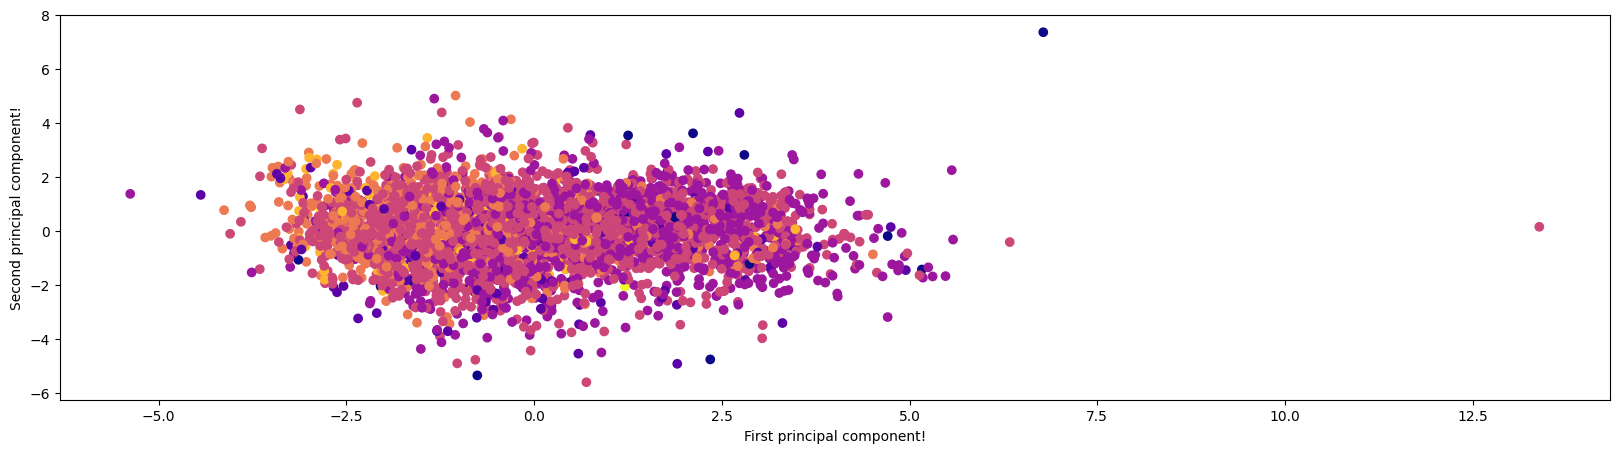

In [31]:
plt.figure(figsize = (20,5))
plt.scatter(whitefeat_after_pca[:,0], whitefeat_after_pca[:,1], c=np.array(whitetar), cmap="plasma")
plt.xlabel("First principal component!")
plt.ylabel("Second principal component!")

In [32]:
fig = px.scatter(x=whitefeat_after_pca[:, 0], y=whitefeat_after_pca[:, 1], title='PCA Transformed Dataset df')
fig.update_xaxes(title_text='Principal Component 1')
fig.update_yaxes(title_text='Principal Component 2')
fig.show()

Red Wine

Text(0, 0.5, 'Second principal component!')

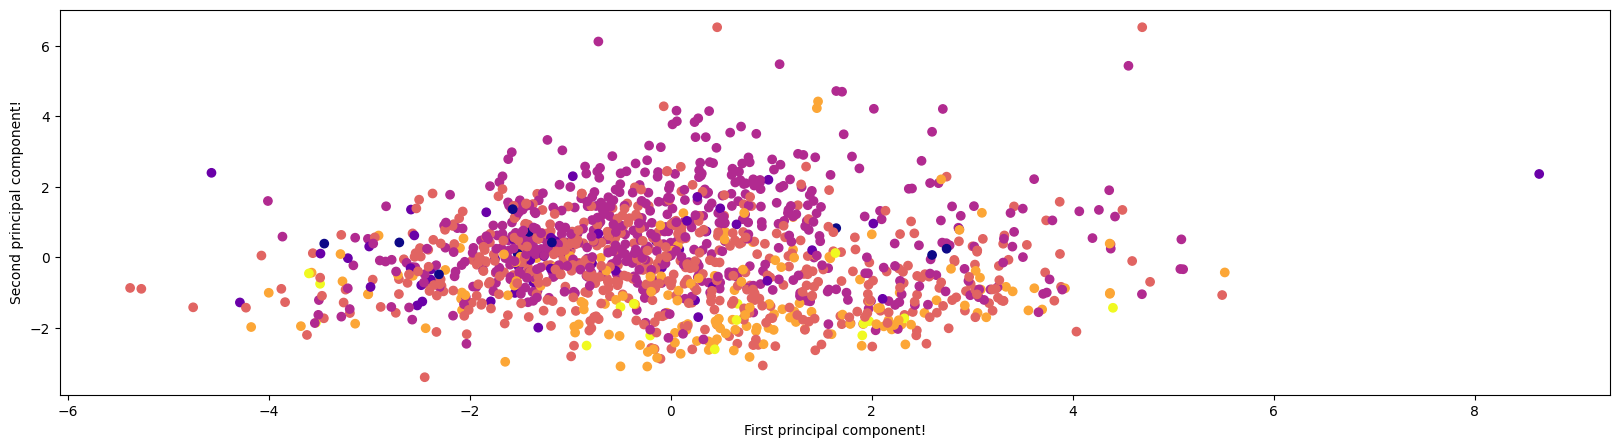

In [33]:
plt.figure(figsize = (20,5))
plt.scatter(redfeat_after_pca[:,0], redfeat_after_pca[:,1], c=np.array(redtar), cmap="plasma")
plt.xlabel("First principal component!")
plt.ylabel("Second principal component!")

In [34]:
fig = px.scatter(x=redfeat_after_pca[:, 0], y=redfeat_after_pca[:, 1], title='PCA Transformed Dataset df')
fig.update_xaxes(title_text='Principal Component 1')
fig.update_yaxes(title_text='Principal Component 2')
fig.show()

# 5. Single Value Decomposition (SVD)

### 5A. Perform SVD on the dataset.

White Wine

In [35]:
# Apply SVD
USVDwhite, Swhite1d, VTwhite = np.linalg.svd(whitefeat, full_matrices=True)

# Prepare S matrix with full dimension.
Swhite = np.zeros(whitefeat.shape)
np.fill_diagonal(Swhite, Swhite1d)

# Print the results
print(f"U matrix:\n{USVDwhite}")
print(f"\nS matrix:\n{Swhite}")
print(f"\nVT matrix:\n{VTwhite}")

U matrix:
[[-1.88607178e-02  2.09921871e-03  4.03925848e-02 ... -1.51686579e-02
  -1.30088118e-02 -1.41561984e-02]
 [-1.40546574e-02 -2.33176707e-02 -1.05280355e-02 ...  3.50916665e-03
  -1.04353014e-02  3.84218784e-03]
 [-1.09126324e-02  6.02154193e-03 -5.06108754e-03 ... -1.85691669e-02
   6.16618864e-03  1.07255755e-02]
 ...
 [-1.23137032e-02  1.76286024e-03 -1.45373787e-02 ...  9.97424211e-01
   8.05340429e-05 -4.72675887e-04]
 [-1.19676742e-02 -9.71108399e-03 -2.07003152e-02 ...  7.46493357e-05
   9.97871022e-01 -1.70176630e-03]
 [-1.07799740e-02 -3.77174421e-03 -2.12060603e-02 ... -4.48199067e-04
  -1.70494444e-03  9.98047585e-01]]

S matrix:
[[9380.48454405    0.            0.         ...    0.
     0.            0.        ]
 [   0.          824.35678771    0.         ...    0.
     0.            0.        ]
 [   0.            0.          289.52176252 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        

Red Wine

In [36]:
# Apply SVD
USVDred, Sred1d, VTred = np.linalg.svd(redfeat, full_matrices=True)

# Prepare S matrix with full dimension.
Sred = np.zeros(redfeat.shape)
np.fill_diagonal(Sred, Sred1d)

# Print the results
print(f"U matrix:\n{USVDred}")
print(f"\nS matrix:\n{Sred}")
print(f"\nVT matrix:\n{VTred}")

U matrix:
[[-0.01663681 -0.01257388 -0.01481092 ... -0.01560266 -0.0163508
  -0.01782596]
 [-0.03221762 -0.00808095  0.01475085 ... -0.02156421 -0.03123227
   0.00893402]
 [-0.02552935 -0.00194875 -0.01064151 ...  0.00135082  0.01448806
   0.05762083]
 ...
 [-0.02730572 -0.04907276  0.0612527  ...  0.99149899 -0.00689878
  -0.0029063 ]
 [-0.02343788 -0.04132224  0.04492486 ... -0.00691498  0.99288962
  -0.00300905]
 [-0.02091276 -0.01905435  0.00197982 ... -0.00321783 -0.0032716
   0.99106776]]

S matrix:
[[2253.10872233    0.            0.         ...    0.
     0.            0.        ]
 [   0.          350.81035502    0.         ...    0.
     0.            0.        ]
 [   0.            0.          240.42330084 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     

### 5B. Explain how SVD can be used for data compression and noise reduction.

SVD is used for data compression as below -
1. SVD decomposes a matrix into three component matrices i.e. A=UΣV. This U, Σ and V is used in rank reduction by Rank Approximation Technique. By reducing the rank, we retain most of the information while removing the noise.
2. SVD is popular in image compression. SVD can decompose an image matrix into subcomponents which is used to form a lower rank image matrix. This lower rank image matrix has less number of pixels as compared to the original image matrix.


Example of Data Compression

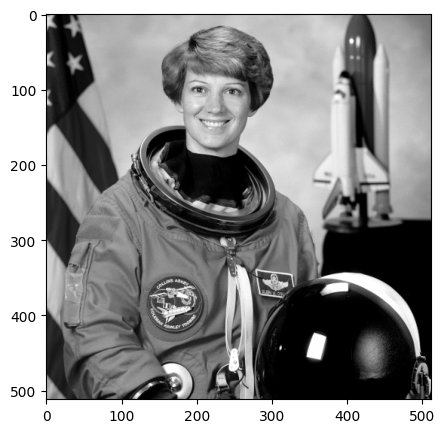

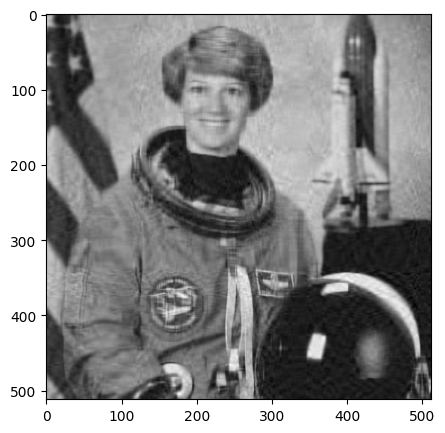

In [37]:
# Load image
image = data.astronaut()
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(image)
image = rgb2gray(data.astronaut())
ax.imshow(image, cmap='gray')

# Apply SVD
U,s,VT = np.linalg.svd(image, full_matrices=True)
S = np.zeros(image.shape)
np.fill_diagonal(S, s)

# Lower the image matrix rank
new_rank = 40

# Apply low rank approximation
Compressed_image = U[:,:new_rank]@S[:new_rank,:new_rank]@VT[:new_rank,:]
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(Compressed_image, cmap='gray')

Here the image is compressed using SVD.

# 6. LU Decomposition and Gaussian Elimination

### 6A. Solve a system of linear equations derived from the dataset using LU Decomposition and Gaussian Elimination.

There are too many rows (3000+). Hence taking first 5 rows and first 5 features (5x5).</br></br>
Now,</br></br>
A = Independent variable, B = Dependent variable, X = To find out</br>
AX = B is called as system of linear equations.</br></br>
Assuming PA = LU, where P = Permutation Matrix</br>
A = Pinv . L . U </br>
Since,AX = B</br>
=> Pinv L U X = B</br></br>
Now, Taking UX = Y,</br>
=> Pinv L Y = B</br>
=> Y = L⁻¹ P B </br></br>
Solving, UX = Y</br>
we get X
=> X = U⁻¹ Y</br>

White Wine using LUD

In [38]:
# Prepare A and B.
A_white_whitefeat = whitefeat.iloc[:5,:5].values
B_white_whitetar = whitetar.iloc[:5,:].values

A_white = A_white_whitefeat
B_white = B_white_whitetar

print("A_white:\n",A_white)
print("\n\nB_white:\n",B_white)

# Decomposing A_white into L and U.
Pwhite, Lwhite, Uwhite = sp.linalg.lu(A_white)

# Print the decompositions.
print(f"\nP:\n{Pwhite}")
print(f"\nL:\n{Lwhite}")
print(f"\nU:\n{Uwhite}")

# Solve for X
PB= np.dot(Pwhite, B_white)
Y = sp.linalg.solve_triangular(Lwhite, PB, lower=True)
X = sp.linalg.solve_triangular(Uwhite, Y)

print(f"\nX:\n{X}")

A_white:
 [[ 7.     0.27   0.36  20.7    0.045]
 [ 6.3    0.3    0.34   1.6    0.049]
 [ 8.1    0.28   0.4    6.9    0.05 ]
 [ 7.2    0.23   0.32   8.5    0.058]
 [ 6.2    0.32   0.16   7.     0.045]]


B_white:
 [[6]
 [6]
 [6]
 [6]
 [6]]

P:
[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]

L:
[[ 1.          0.          0.          0.          0.        ]
 [ 0.7654321   1.          0.          0.          0.        ]
 [ 0.77777778  0.77803738  1.          0.          0.        ]
 [ 0.86419753  0.26518692  0.37221494  1.          0.        ]
 [ 0.88888889 -0.17873832 -0.43250328  0.02882692  1.        ]]

U:
[[ 8.10000000e+00  2.80000000e-01  4.00000000e-01  6.90000000e+00
   5.00000000e-02]
 [ 0.00000000e+00  1.05679012e-01 -1.46172840e-01  1.71851852e+00
   6.72839506e-03]
 [ 0.00000000e+00  0.00000000e+00  1.42616822e-01 -5.10373832e+00
   4.87616822e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.61809961e+01
  -1.80914155e-03]
 [

White Wine using Gaussian Elimination

In [39]:
n = 5

def mygaussiansolver(mat):
	if (feliminator(mat) != -1):
		print("It is singular Matrix.")
		if (mat[feliminator(mat)][n]):
			print("The system of equation is inconsistent.")
		else:
			print("System of equation has many solutions.")
		return
	backer(mat)

def swapper(mymat, i, j):
	for k in range(n + 1):
		mymat[i][k], mymat[j][k] = mymat[j][k], mymat[i][k]

def feliminator(mymat):
	for knum in range(n):
		max_of_i = knum
		max_of_v = mymat[knum][knum]
		for i in range(knum + 1, n):
			if (abs(mymat[i][knum]) > max_of_v):
				max_of_v = mymat[i][knum]
				max_of_i = i
		if not mymat[knum][max_of_i]:
			return knum 
		if (max_of_i != knum):
			swapper(mymat, knum, max_of_i)
		for i in range(knum + 1, n):
			f = mymat[i][knum]/mymat[knum][knum]
			for j in range(knum + 1, n + 1):
				mymat[i][j] -= mymat[knum][j]*f
			mymat[i][knum] = 0
	return -1

def backer(mymat):
	myx = [None for _ in range(n)] 
	for i in range(n-1, -1, -1):
		myx[i] = mymat[i][n]
		for j in range(i + 1, n):
			myx[i] -= mymat[i][j]*myx[j]
		myx[i] = (myx[i]/mymat[i][i])
	print("\nX:")
	for i in range(n):
		print("{:.8f}".format(myx[i]))

mat = np.hstack((A_white, B_white))
mygaussiansolver(mat)


X:
-0.02816711
9.94487576
0.64730502
0.02849025
59.76167284


Red Wine using LUD

In [40]:
# Prepare A and B.
A_red_redfeat = redfeat.iloc[:5,:5].values
B_red_redtar = redtar.iloc[:5,:].values

A_red = A_red_redfeat
B_red = B_red_redtar

print("A_red:\n",A_red)
print("\n\nB_red:\n",B_red)

# Decomposing A_red into L and U.
Pred, Lred, Ured = sp.linalg.lu(A_red)

# Print the decompositions.
print(f"\nP:\n{Pred}")
print(f"\nL:\n{Lred}")
print(f"\nU:\n{Ured}")

# Solve for X
PB= np.dot(Pred, B_red)
Y = sp.linalg.solve_triangular(Lred, PB, lower=True)
X = sp.linalg.solve_triangular(Ured, Y)

print(f"\nX:\n{X}")

A_red:
 [[ 7.4    0.7    0.     1.9    0.076]
 [ 7.8    0.88   0.     2.6    0.098]
 [ 7.8    0.76   0.04   2.3    0.092]
 [11.2    0.28   0.56   1.9    0.075]
 [ 7.4    0.66   0.     1.8    0.075]]


B_red:
 [[5]
 [5]
 [5]
 [6]
 [5]]

P:
[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]

L:
[[ 1.          0.          0.          0.          0.        ]
 [ 0.69642857  1.          0.          0.          0.        ]
 [ 0.66071429  0.69343066  1.          0.          0.        ]
 [ 0.66071429  0.75182482  0.771261    1.          0.        ]
 [ 0.69642857  0.82481752  0.28445748 -0.39225858  1.        ]]

U:
[[ 1.12000000e+01  2.80000000e-01  5.60000000e-01  1.90000000e+00
   7.50000000e-02]
 [ 0.00000000e+00  6.85000000e-01 -3.90000000e-01  1.27678571e+00
   4.57678571e-02]
 [ 0.00000000e+00  0.00000000e+00 -9.95620438e-02 -3.40719499e-01
  -6.29040667e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.24926686e-02
  -3.11143695e-03]
 [ 0.0

Red Wine using Gaussian Elimination

In [41]:
mat = np.hstack((A_red, B_red))
mygaussiansolver(mat)


X:
0.60937982
4.42764579
0.99506325
-1.90373342
13.26751003


### 6B. Discuss the stability and efficiency of above methods.
1. Gaussian elimination is computationally expensive whereas LUD is computationally efficient.
2. Gaussian elimination is O(n^3) time complexity algorithm whereas LU decomposition uses O(n^2).
3. Gaussian elimination is stable with linear equations but are prone to precision issues when rounding off. LU decomposition is preferred for drastically non-uniform datasets where rounding off errors are handled in better manner. For example -  I tried with 11x11 matrix from above dataset and the answers coming from Gaussian Elimination were nearly wrong.
4. LU decompostion has advantage when Ax = B is solved for multiple vectors. Gaussian elimination has to start from scratch for each solution.

# 7. QR Factorization

### 7A. Use QR Factorization to solve linear systems.

White Wine

AX = B</br>
where,</br>
A = features</br>
B = target</br>

In [53]:
# Prepare A and B.
A_white = whitefeat.iloc[:5,:5].values
B_white = whitetar.iloc[:5,:].values

# Perform QR factorization
Q_A_white, R_A_white = np.linalg.qr(A_white)
Q_A_T_B = Q_A_white.T@B_white

# Solve for X
X_white = np.linalg.solve(R_A_white, Q_A_T_B)

print(f"Solutions for white wine:\n{X_white}")

Solutions for white wine:
[[-2.81671127e-02]
 [ 9.94487576e+00]
 [ 6.47305023e-01]
 [ 2.84902535e-02]
 [ 5.97616728e+01]]


Red Wine

In [54]:
# Prepare A and B.
A_red = redfeat.iloc[:5,:5].values
B_red = redtar.iloc[:5,:].values

# Perform QR factorization
Q_A_red, R_A_red = np.linalg.qr(A_red)
Q_A_T_B = Q_A_red.T@B_red

# Solve for X
X_red = np.linalg.solve(R_A_red, Q_A_T_B)

print(f"Solutions for red wine:\n{X_red}")

Solutions for red wine:
[[ 0.60937982]
 [ 4.42764579]
 [ 0.99506325]
 [-1.90373342]
 [13.26751003]]


### 7B. Discuss its applications in numerical analysis.

Applications of QR Factorization in numerical analysis -
1. QR Factorization is used in solving linear systems of equation.
2. QR Algorithm uses QR Factorization to converge to its eigenvalues and eigen vectors.
3. QR factorization is commonly used in the Least Squares Approximation.
4. QR factorization can help in decomposing a matrix into 2 components matrix.
5. A=QR, where Q has orthonormal columns and R is an upper triangular matrix.

# 8. Row Echelon Form (REF) and Reduced Row Echelon Form (RREF).

### 8A. Convert the dataset matrix into REF and RREF. 

White Wine

In [44]:
def refconverter(mymat):
    for colmn_ind, piv_ind in enumerate(range(mymat.shape[1])):
        nonzero_row_idx = np.argmax(mymat[piv_ind:, colmn_ind] != 0) + piv_ind
        mymat[[piv_ind, nonzero_row_idx]] = mymat[[nonzero_row_idx, piv_ind]]
        mymat[piv_ind] /= mymat[piv_ind, colmn_ind]
        for row_idx in range(piv_ind + 1, mymat.shape[0]):
            mymat[row_idx] -= mymat[row_idx, colmn_ind] * mymat[piv_ind]
    return mymat

def rrefconverter(mymat):
    mymat = refconverter(mymat)
    for piv_ind in reversed(range(mymat.shape[0])):
        piv_colmn_ind = np.argmax(mymat[piv_ind] != 0)
        for row_idx in range(piv_ind):
            mymat[row_idx] -= mymat[row_idx, piv_colmn_ind] * mymat[piv_ind]
    return mymat

A_white = whitefeat.values
A_white_REF = refconverter(A_white.copy())
A_white_RREF = rrefconverter(A_white.copy())
print(f"REF for white wine:\n{A_white_REF}")
print(f"RREF for white wine:\n{A_white_RREF}")

REF for white wine:
[[ 1.00000000e+00  3.85714286e-02  5.14285714e-02 ...  4.28571429e-01
   6.42857143e-02  1.25714286e+00]
 [ 0.00000000e+00  1.00000000e+00  2.80701754e-01 ...  1.05263158e+01
   1.49122807e+00  2.77192982e+01]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00 ... -1.73959732e+01
   4.33221477e+00 -1.09261745e+02]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
RREF for white wine:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Red Wine

In [45]:
A_red = redfeat.values
A_red_REF = refconverter(A_red.copy())
A_red_RREF = rrefconverter(A_red.copy())
print(f"REF for red wine:\n{A_red_REF}")
print(f"RREF for red wine:\n{A_red_RREF}")

REF for red wine:
[[ 1.          0.09459459  0.         ...  0.47432432  0.07567568
   1.27027027]
 [ 0.          1.          0.         ... -3.51520913  0.63117871
  -0.76045627]
 [ 0.          0.          1.         ... -9.04562738  1.14353612
  -2.28136882]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
RREF for red wine:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 8B. Explain the significance of these forms in solving linear equations.

Below are its significance -
1. RREF is used in Gauss-Jordan Elimination Method and REF is used in Gaussian Elimination method.
2. RREF is popular in finding the inverse of a matrix whereas REF is popular for finding the rank of a matrix.
3. REF converts a matrix into below form:
</br>
[A:I]    ->   [I:A^-1]
</br>
whereas REF converts a matrix to below form:</br>
[ _ ]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ _ ]</br>
[ _ ] [ _ ]&nbsp;&nbsp;&nbsp;&nbsp;or&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ _ ] [ _ ]</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                  [ _ ] [ _ ] [ _ ]</br>
4. Both REF and RREF help in determining the existence of solutions to linear systems and whether the solution is unique.
5. Both REF and RREF provide information about the NULL spaces of a matrix.

# 9. Dimensionality Reduction and Low-Rank Approximation

### 9A. Apply low-rank approximation techniques to the dataset.

White Wine

In [46]:
# Print previous rank:
print("Previous rank:", np.linalg.matrix_rank(whitefeat))

# set a wanted rank rank
wanted_rank = 8

# Find the low rank matrix
Low_Rank_Matrix = np.dot(np.dot(USVDwhite[:,:wanted_rank],
                                Swhite[:wanted_rank,:wanted_rank]),
                                VTwhite[:wanted_rank,:])
print("Low_Rank_Matrix Shape",Low_Rank_Matrix.shape)
print("New matrix rank:", np.linalg.matrix_rank(Low_Rank_Matrix))

Previous rank: 11
Low_Rank_Matrix Shape (3961, 11)
New matrix rank: 8


Red Wine

In [47]:
# Print previous rank:
print("Previous rank:", np.linalg.matrix_rank(redfeat))

# set a wanted rank rank
wanted_rank = 8

# Find the low rank matrix
Low_Rank_Matrix = np.dot(np.dot(USVDred[:,:wanted_rank],
                                Sred[:wanted_rank,:wanted_rank]),
                                VTred[:wanted_rank,:])
print("Low_Rank_Matrix Shape",Low_Rank_Matrix.shape)
print("New matrix rank:", np.linalg.matrix_rank(Low_Rank_Matrix))

Previous rank: 11
Low_Rank_Matrix Shape (1359, 11)
New matrix rank: 8


### 9B. Discuss how low rank approximation techniques help in reducing the curse of dimensionality.

Low rank approximation techniques can help in multiple ways -
1. Noise is a curse which comes along with the blessings of dimensionality.
2. High Dimension means more information which means more noise and more unwanted information.
3. Low rank approximation discards the components of a matrix which has very less information, hence, reduces the noise.
4. Low rank approximated matrix are still close to equal to the original matrix.
5. One great example of low rank approximation is image compression. Modern image compression technologies which use SVD, they use low rank approximation technique to discard the noise from image matrix hence compressing it while retaining the most of it.

# 10. Spectral Decomposition and Eigen Solvers

### 10A. Perform spectral decomposition of the covariance matrix and use eigen solvers to analyze the dataset.

Spectral Decomposition of a matrix A</br>
A = Σᴺᵢ₌₁ (λᵢ)(Vᵢ)(Vᵢ)ᵀ

Spectral decomposition of A</br>
   A = A1 + A2 + ...</br>
=> A = (λ₁)(V₁)(V₁)ᵀ + (λ₂)(V₂)(V₂)ᵀ + ...</br>

White Wine

In [48]:
Awhite = cov_matrix_white
eval, evector = np.linalg.eig(Awhite)

evec_sc = []
for i in range(cov_matrix_white.shape[0]):
    evec_sc.append(evector[:,i:i+1])

A_white_comp = []
print("Components after spectral decomposition are:")
for i in range(cov_matrix_white.shape[0]):
    A_white_comp.append(eval[i]*(evec_sc[i]@evec_sc[i].T))
    print(f"\nA_white[{i}]:\n",A_white_comp[i])

# Debugging code - to check restored matrix
print("\nOriginal Matrix:\n",Awhite)
calc_Awhite = np.zeros(Awhite.shape)
for i in range(cov_matrix_white.shape[0]):
    calc_Awhite += A_white_comp[i]
print("\nRestored Matrix:\n",calc_Awhite)

# Print the difference to verify if restoration was a success.
# Should be 0.
print("\nCheck the difference:\n",Awhite-calc_Awhite)

Components after spectral decomposition are:

A_white[0]:
 [[ 3.82858720e-03  5.46873850e-04  9.41924980e-04  1.25697868e-01
   2.70000500e-04  7.24227631e-01  2.66009667e+00  9.60569781e-05
   5.65179595e-05  9.20125806e-04 -3.34385184e-02]
 [ 5.46873850e-04  7.81152399e-05  1.34544184e-04  1.79546327e-02
   3.85667624e-05  1.03448382e-01  3.79967135e-01  1.37207400e-05
   8.07300251e-06  1.31430399e-04 -4.77634446e-03]
 [ 9.41924980e-04  1.34544184e-04  2.31736309e-04  3.09247133e-02
   6.64266482e-05  1.78177500e-01  6.54448070e-01  2.36323381e-05
   1.39047839e-05  2.26373185e-04 -8.22668365e-03]
 [ 1.25697868e-01  1.79546327e-02  3.09247133e-02  4.12683665e+00
   8.86449370e-03  2.37774051e+01  8.73346909e+01  3.15368482e-03
   1.85556359e-03  3.02090160e-02 -1.09783328e+00]
 [ 2.70000500e-04  3.85667624e-05  6.64266482e-05  8.86449370e-03
   1.90410368e-05  5.10741461e-02  1.87595944e-01  6.77415211e-06
   3.98577243e-06  6.48893219e-05 -2.35815882e-03]
 [ 7.24227631e-01  1.03448

Red Wine

In [49]:
Ared = cov_matrix_red
eval, evector = np.linalg.eig(Ared)

evec_sc = []
for i in range(cov_matrix_red.shape[0]):
    evec_sc.append(evector[:,i:i+1])

A_red_comp = []
print("Components after spectral decomposition are:")
for i in range(cov_matrix_red.shape[0]):
    A_red_comp.append(eval[i]*(evec_sc[i]@evec_sc[i].T))
    print(f"\nA_red[{i}]:\n",A_red_comp[i])

# Debugging code - to check restored matrix
print("\nOriginal Matrix:\n",Ared)
calc_Ared = np.zeros(Ared.shape)
for i in range(cov_matrix_red.shape[0]):
    calc_Ared += A_red_comp[i]
print("\nRestored Matrix:\n",calc_Ared)

# Print the difference to verify if restoration was a success.
# Shold be 0.
print("\nCheck the difference:\n",Ared-calc_Ared)

Components after spectral decomposition are:

A_red[0]:
 [[ 3.55548703e-02 -2.31919112e-03 -1.54490312e-03 -5.17063587e-02
  -4.07684944e-04 -1.38469658e+00 -6.29203475e+00 -2.58832067e-05
   2.10003283e-03 -1.19640296e-03  4.35467769e-02]
 [-2.31919112e-03  1.51277375e-04  1.00771724e-04  3.37272860e-03
   2.65926804e-05  9.03216913e-02  4.10420035e-01  1.68832294e-06
  -1.36982007e-04  7.80395794e-05 -2.84049126e-03]
 [-1.54490312e-03  1.00771724e-04  6.71279522e-05  2.24670527e-03
   1.77144153e-05  6.01667801e-02  2.73396696e-01  1.12465736e-06
  -9.12490251e-05  5.19851892e-05 -1.89216134e-03]
 [-5.17063587e-02  3.37272860e-03  2.24670527e-03  7.51949735e-02
   5.92883725e-04  2.01372182e+00  9.15031339e+00  3.76411546e-05
  -3.05401341e-03  1.73989218e-03 -6.33287436e-02]
 [-4.07684944e-04  2.65926804e-05  1.77144153e-05  5.92883725e-04
   4.67466234e-06  1.58774295e-02  7.21467358e-02  2.96786167e-07
  -2.40797325e-05  1.37183871e-05 -4.99323021e-04]
 [-1.38469658e+00  9.0321691

# 11. Linear Dependence and Independence

### 11A. Analyze the linear dependence and independence of the features in the dataset.

White Wine

In [50]:
# Ways to identify the linear dependence/independence

# 1. Determinant of covariant matrix of the features.
print(f"Covariance matrix:\n{cov_matrix_white}")
print(f"\nDeterminant of above covariance matrix:\n{np.linalg.det(cov_matrix_white)}")

# 2. Eigen values of the covariant matrix.
eigval, eigvec = np.linalg.eig(cov_matrix_white)
print(f"\nEigen values of covariance matrix are:\n{eigval}")

# 3. Pearson Correlation Test (self-study)
cor_matrix_white = whitefeat.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(cor_matrix_white)
print("\nPearson correlation and p-values for individual pairs:")
for col1 in whitefeat.columns:
    for col2 in whitefeat.columns:
        if col1 != col2:
            corr, p_value = sp.stats.pearsonr(whitefeat[col1], whitefeat[col2])
            print(f"{col1} - {col2}: Correlation = {corr}, P-value = {p_value}")

Covariance matrix:
[[ 7.51445810e-01 -1.72280486e-03  3.17325304e-02  3.52405400e-01
   4.81362157e-04 -8.71193700e-01  3.08161394e+00  6.69984264e-04
  -5.66559756e-02 -1.71747250e-03 -1.16884957e-01]
 [-1.72280486e-03  1.06992310e-02 -2.06735547e-03  4.94525087e-02
   2.06197523e-04 -1.82413871e-01  4.56442631e-01  1.82078788e-05
  -7.36016668e-04 -2.48357945e-04  5.89356927e-03]
 [ 3.17325304e-02 -2.06735547e-03  1.49930451e-02  6.32609085e-02
   3.75075485e-04  1.93199963e-01  6.48740995e-01  5.69321864e-05
  -3.39605127e-03  6.87267219e-04 -1.14025375e-02]
 [ 3.52405400e-01  4.94525087e-02  6.32609085e-02  2.36356048e+01
   8.54634397e-03  2.56726088e+01  8.58807174e+01  1.15863529e-02
  -1.22300227e-01 -1.13156816e-02 -2.35595176e+00]
 [ 4.81362157e-04  2.06197523e-04  3.75075485e-04  8.54634397e-03
   5.33735431e-04  4.02657393e-02  1.90456631e-01  1.69832016e-05
  -3.17105482e-04  4.68691784e-05 -1.00360121e-02]
 [-8.71193700e-01 -1.82413871e-01  1.93199963e-01  2.56726088e+01


Interpretation of outputs above - 
1. Determinant of the covariance matrix is 0. This means that some of the features are linearly dependent.
2. One of eigen value of the covariance matrix is 0 and another is nearly 0. This is a sign of linear dependence of 2 features.
3. The pearson test shows that residual sugar and density are linearly dependent (co-efficient = 0.820498).
4. The pearson test also shows that free sulphur dioxide and total sulphur dioxide are linearly dependent (co-efficient = 0.619437).

Red Wine

In [51]:
# Ways to identify the linear dependence/independence

# 1. Determinant of covariant matrix of the features.
print(f"Covariance matrix:\n{cov_matrix_red}")
print(f"\nDeterminant of above covariance matrix:\n{np.linalg.det(cov_matrix_red)}")

# 2. Eigen values of the covariant matrix.
eigval, eigvec = np.linalg.eig(cov_matrix_red)
print(f"\nEigen values of covariance matrix are:\n{eigval}")

# 3. Pearson Correlation Test (self-study)
cor_matrix_red = redfeat.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(cor_matrix_red)
print("\nPearson correlation and p-values for individual pairs:")
for col1 in redfeat.columns:
    for col2 in redfeat.columns:
        if col1 != col2:
            corr, p_value = sp.stats.pearsonr(redfeat[col1], redfeat[col2])
            print(f"{col1} - {col2}: Correlation = {corr}, P-value = {p_value}")

Covariance matrix:
[[ 3.01713359e+00 -8.11100713e-02  2.26691760e-01  2.60793849e-01
   7.36621492e-03 -2.55107774e+00 -6.02227102e+00  2.17564739e-03
  -1.84921890e-01  5.64047489e-02 -1.15772221e-01]
 [-8.11100713e-02  3.35004632e-02 -1.97287878e-02 -6.06138670e-04
   4.98451966e-04 -4.00502608e-02  4.38443625e-01  8.19017151e-06
   7.01214911e-03 -8.02637666e-03 -3.91770786e-02]
 [ 2.26691760e-01 -1.97287878e-02  3.82345403e-02  3.80488390e-02
   2.02942424e-03 -9.80646343e-02  3.09371620e-01  1.30814165e-04
  -1.66827861e-02  1.08812263e-02  2.22391213e-02]
 [ 2.60793849e-01 -6.06138670e-04  3.80488390e-02  1.82875250e+00
   1.77991081e-03  2.26792558e+00  9.08279381e+00  8.20185907e-04
  -1.74316746e-02 -2.73182384e-03  9.25987011e-02]
 [ 7.36621492e-03  4.98451966e-04  2.02942424e-03  1.77991081e-03
   2.43807454e-03  3.86174481e-04  7.55086423e-02  1.78649019e-05
  -2.07374385e-03  3.32493194e-03 -1.19586738e-02]
 [-2.55107774e+00 -4.00502608e-02 -9.80646343e-02  2.26792558e+00


Interpretation of outputs above - 
1. Determinant of the covariance matrix is 0. This means that some of the features are linearly dependent.
2. One of eigen value of the covariance matrix is 0. This is a sign of linear dependence of 2 features.
3. The person test shows high linear dependence between free sulfur dioxide and total sulfur dioxide. (Coefficient = 0.667246)
3. The pearson test shows that pH and density are linearly dependent (co-efficient = 0.686685).
4. The pearson test also shows that fixed acidity and density are linearly dependent. (coefficient = 0.670195.)
5. Higher the value of coriant matrix elements, bigger is the correlation. Example free sulfur dioxide and total sulfur dioxide.

### 11B. Discuss the implications of these properties in data analysis.

1. Datasets may contain redundant or correlated variables, leading to linear dependence. Such feature with multicollinearity are highly harmful for predictive models.
2. Linear dependency can be used during feature selection. Direct feature selection is a trivial way to reduce the dimensionality.
3. Linear dependency check is useful in dimensionality reduction techniques. For example - PCA rely on finding linearly independent components using covariance matrix.
4. Linearly dependent features add unwanted computational cost to machine learning and statistical models.

# THE END